# Hashtag Analysis - Hashtag network of BLM-related tweets

## Co-occurrence Network Construction (R)

Here, network analysis techniques are applied on a corpus of tweets, released between 10 January and 10 February 2022 concerning the Black Lives Matter movement.
In particular, each hashtag in the corpus is considered as a node, the co-occurrence between two hashtags (such as #blacklivesmatter and #georgefloyd) is considered as an edge.

This representation allows us to identify the central hashtags in the public discussion around Black Lives Matter. 

Let's load the code:

In [ ]:
#***LOADING USEFUL LIBRARIES
library(seededlda)
library(lubridate)
library(rtweet)
library(maps)
library(tidytext) #to load the stop_words dataset
library(ldatuning)
library(topicmodels)
library(dplyr)
library(ggplot2)
library(repr)
library(quanteda)
library(quanteda.corpora)
library(quanteda.textplots)

Let's load the dataset:

In [ ]:
#***BASIC OPERATION - DATASET LOADING AND DELETING DUPLICATES***
#Loading the scraped datasets
blm1 <- readRDS("BLM18")
blm2 <- readRDS("BLM25")
blm3 <- readRDS("BLM02Feb")

In [ ]:
#Joining the datasets
blmdf<-rbind(blm1,blm2)
blmdf<-rbind(blmdf,blm3)
#Removing the duplicate rows
blmdf<-unique(blmdf)

In [ ]:
data <- subset(blmdf,select=c("text","status_id","user_id","created_at"))

In [ ]:
#Saving the dataset into a csv file
write.csv(data,"blm_dataset.csv")

Now we build our Document-Feature-Matrix through the corpus of tweets contained in the dataset:

In [ ]:
#Building the DFM of Twitter posts
tweet_dfm <- tokens(blmdf$text, remove_punct = TRUE) %>%
    dfm()
summary(tweet_dfm)

    Length      Class       Mode 
3796451798        dfm         S4 

Let's explore the top hashtags and put them into a co-occurrence matrix:

In [ ]:
#Extract most common hashtags
tag_dfm <- dfm_select(tweet_dfm, pattern = "#*")
toptag <- names(topfeatures(tag_dfm, 50))
head(toptag)

[1] "#blacklivesmatter" "#blm"              "#foxnews"         
[4] "#art"              "#cuba"             "#racism"

In [ ]:
#Construct feature-occurrence matrix of hashtags
tag_fcm <- fcm(tag_dfm)
head(tag_fcm)

Feature co-occurrence matrix of: 6 by 3,822 features.
                   features
features            #noirsenfrance #georgefloyd #art #photography
  #noirsenfrance                 0            0    0            0
  #georgefloyd                   0           14   76           69
  #art                           0            0    1          121
  #photography                   0            0    0            0
  #blacklivesmatter              0            0    0            0
  #usa                           0            0    0            0
                   features
features            #blacklivesmatter #usa #protest #currentevents #sign
  #noirsenfrance                    0    0        0              0     0
  #georgefloyd                     40   20       26              2     2
  #art                            233   35       47             28     4
  #photography                     98   35       46             28     4
  #blacklivesmatter                29   26       42            

Now we can visualize this matrix as an undirected graph:

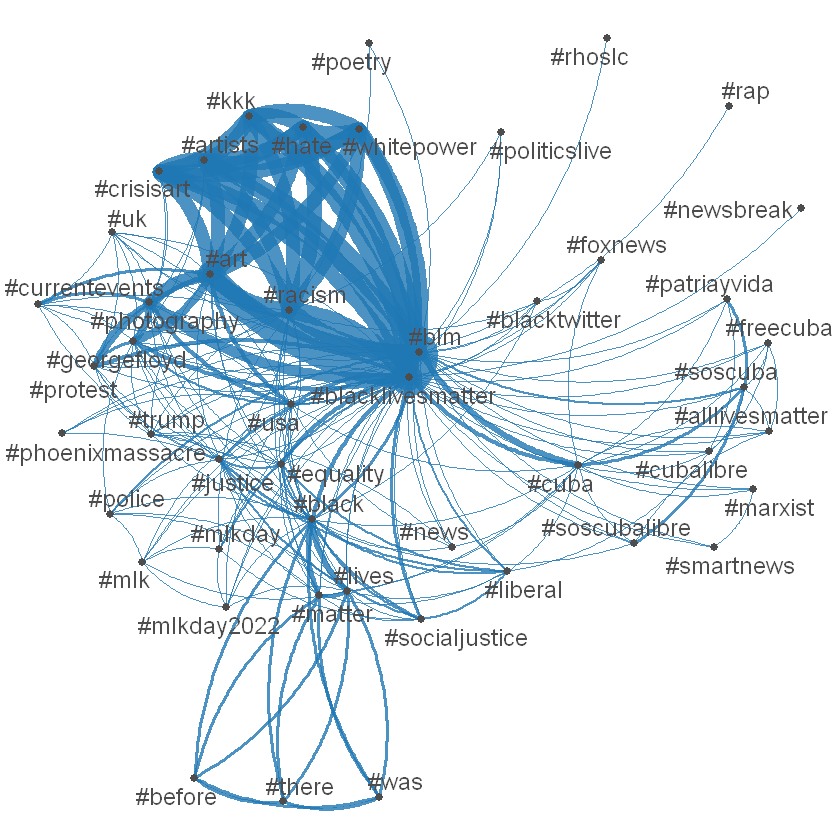

In [ ]:
topgat_fcm <- fcm_select(tag_fcm, pattern = toptag)
textplot_network(topgat_fcm, min_freq = 0.1, edge_alpha = 0.8, edge_size = 5)

In [ ]:
gr <- graph_from_adjacency_matrix(topgat_fcm, weighted = TRUE, diag = FALSE, add.colnames="features")
